# European Soccer Database using simple neural network

![](https://img.freepik.com/free-photo/football-ball-disintegrating-with-copy-space_23-2150169914.jpg?t=st=1737542621~exp=1737546221~hmac=cbf1cdb4ab5e4b25193a8c66c4835bca9288ddbb3eb2fec9f1c7a0a0a2881cca&w=1060)

### European Soccer Database ⚽

The **European Soccer Database** is a rich dataset that contains comprehensive information about European football (soccer) teams, players, and matches. The primary goal of analyzing this dataset is to gain insights into team and player performance, match outcomes, and historical trends. Here’s an overview of the types of data typically included and the analysis possibilities:

---

### Key Components 🔑:
1. **Teams** 🏆:
   - Data about **football teams**, including team names, countries, and leagues.
   - Includes **team attributes**, such as squad size, skill ratings, and financial stats.

2. **Players** ⚽:
   - Data for individual **players**, including personal information like age, nationality, and position.
   - Player **attributes** like skill ratings, height, weight, and performance metrics (goals, assists, etc.).

3. **Matches** 🗓️:
   - Information about **matches**, including match dates, teams involved, match outcomes, and scores.
   - Includes **match events** (goals, red/yellow cards, substitutions, etc.).

4. **Statistics** 📊:
   - **Player performance stats** such as goals, assists, minutes played, shots on target, etc.
   - **Team performance stats** such as win rates, points per match, and goals scored/conceded.

---

### Analytical Applications 📈:
1. **Player Evaluation** 💡:
   - By analyzing player attributes, we can predict player performance, transfer values, and even suggest potential signings based on comparative statistics.

2. **Match Prediction** 🔮:
   - Using historical data from past matches, predictive models can be built to forecast match outcomes (win, loss, or draw), based on team and player attributes.

3. **Team Analysis** 🏅:
   - Teams can be analyzed by metrics such as team strength, goals scored/conceded, average player performance, etc. This can help in performance benchmarking and tactical analysis.

4. **Player Transfer Valuation** 💸:
   - Machine learning models can be applied to estimate a player's market value based on past performance and attributes such as age, position, and overall ability.

5. **Exploratory Data Analysis (EDA)** 🧑‍💻:
   - Visualizing team performance over seasons, identifying patterns in goal-scoring trends, and understanding relationships between different player statistics.

---

### Simple Model Example 🧠:
You can apply a simple **Neural Network (NN)** model to predict a **match outcome** or a **team's performance**. Here's a basic framework:
- **Input**: Team and player stats for both teams in a match.
- **Output**: Win, Draw, or Loss for the home team.
- **Features**: Goals scored, goals conceded, player skill ratings, match location, etc.

You would split the data into training and test sets, preprocess it (normalize/scale numerical features), and then use the Neural Network for classification.

---

### Example Use Cases 📚:
1. **Predicting Match Outcomes** 🏁:
   Using player and team statistics, a model can predict the likelihood of a win, loss, or draw in a match.

2. **Player Performance Prediction** 📅:
   Based on a player’s historical data (goals, assists, etc.), we can forecast future performance or even determine the player's potential growth trajectory.

3. **Team Strength Analysis** 💪:
   By aggregating player statistics, we can assess a team’s overall strength and predict its performance against other teams.

---

In conclusion, the European Soccer Database offers a vast amount of data that can be leveraged for numerous applications in football analytics, including match predictions, player scouting, and team analysis. ⚽📊

In [1]:
# load libraries
import sqlite3
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


## Step 1: Load the SQLite Database in Python

In [2]:
# Connect to the SQLite database
db_path = '/kaggle/input/soccer/database.sqlite' 
conn = sqlite3.connect(db_path)

# List all available tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

query = "SELECT * FROM Player_Attributes;"
player_attributes = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Preview the data
print(player_attributes.head())


                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   


## Step 2: Preprocess Data


In [3]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Select relevant features
features = ['potential', 'acceleration', 'sprint_speed', 'agility', 'stamina']
target = 'overall_rating'

# Drop missing values
data = player_attributes[features + [target]].dropna()

# Normalize features for NN compatibility
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Split data into training and testing sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X_train.shape

(145012, 5)

## Step 3: Define and Train a Single-Layer Neural Network

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation = 'linear', input_shape = (X_train.shape[1],))
output_layer = tf.keras.layers.Dense(1, activation = 'linear')

# Combine the neural network
model = tf.keras.models.Sequential([input_layer,
                                   output_layer])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1750.2365 - mae: 32.7938 - val_loss: 62.4914 - val_mae: 5.9584
Epoch 2/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 52.0569 - mae: 5.4623 - val_loss: 23.8426 - val_mae: 3.7815
Epoch 3/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 21.2956 - mae: 3.5906 - val_loss: 19.3446 - val_mae: 3.3707
Epoch 4/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 19.1891 - mae: 3.4138 - val_loss: 19.1166 - val_mae: 3.3972
Epoch 5/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 19.2544 - mae: 3.4283 - val_loss: 19.1179 - val_mae: 3.3944
Epoch 6/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 19.1348 - mae: 3.4124 - val_loss: 19.1322 - val_mae: 3.4286
Epoch 7/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 19.2329 - mae: 3.4220 - val_loss: 19.1597 - val_mae: 3.3804
Epoch 8/10
3626/3626 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 19.1744 - mae: 3.4143 - val_loss: 19.1119 - val_mae: 3.4003
Epoch 9/10
3626/3626 

## Step 4: Evaluate the Model

Mean Absolute Error on Test Set: 3.399151086807251
1133/1133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


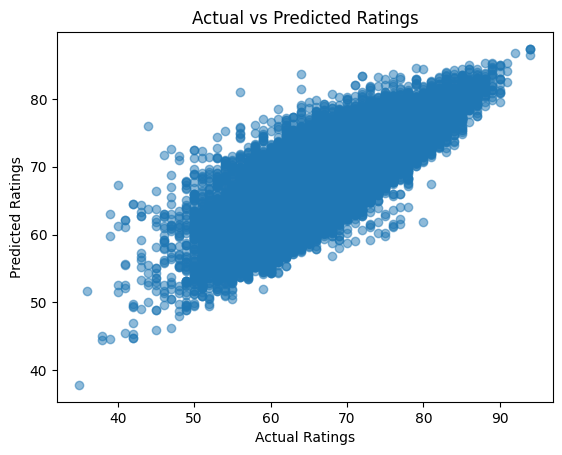

In [6]:
# Evaluate on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Set: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


In [7]:
target_range = y_test.max() - y_test.min()
print(f"Target Range: {target_range}")

Target Range: 59.0


***If you find this work helpful, your appreciation would be greatly valued. Additionally, I encourage you to explore my other notebooks for further insights and analysis.***